In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,SelectPercentile, chi2

In [ ]:
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [ ]:
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=0) #None gives us the dataset with column name i.e. header
	# retrieve numpy array
	dataset = data.values
	# get features and target labels
	features = dataset[:, :-1]
	target = dataset[:,-1]
	X=[]
	y=[]
	cols = data.columns[1:-1]
	# type cast into required types   

	for j in range(1,int(len(features))):
		X.append([float(i) for i in features[j][1:]])
		y.append(int(target[j]))
	return X, y, cols

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# load the dataset
X, y, cols = load_dataset('blackhole_dataset5.csv')

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


In [ ]:
cols[fs.get_support()]
#fs.scores_

Index(['sourcePort', 'destinationPort', 'timeFirstTxPacket',
       'timeFirstRxPacket', 'timeLastRxPacket', 'delaySum', 'txBytes',
       'txPackets', 'rxPackets', 'lostPackets'],
      dtype='object')

sourcePort: 126.690433
destinationPort: 126.690433
timeFirstTxPacket: 18.104735
timeFirstRxPacket: 156.328770
timeLastTxPacket: 1.773101
timeLastRxPacket: 44.882340
delaySum: 21.444628
jitterSum: 0.371530
lastDelay: 3.810699
txBytes: 127.453614
rxBytes: 12.532440
txPackets: 152.506416
rxPackets: 120.080858
lostPackets: 110.685323
throughput: 0.153082


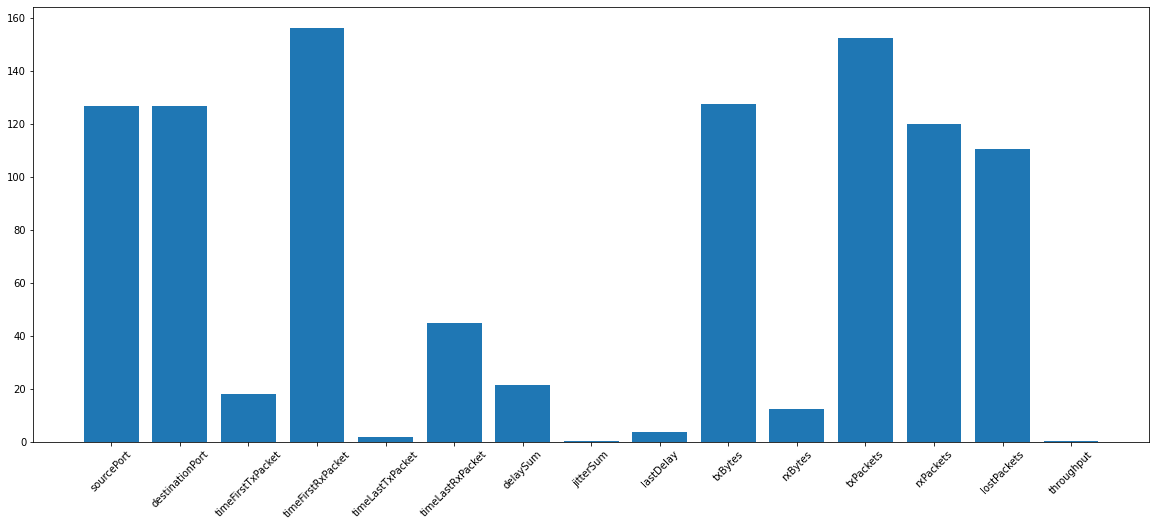

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('%s: %f' % (cols[i], fs.scores_[i]))
# plot the scores
pyplot.figure(figsize=(20, 8))
pyplot.bar([cols[i] for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score

model = svm.SVC(gamma='auto')
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1_score = f1_score(y_test,y_pred,average='binary')

print('Accuracy: %.2f' % (accuracy*100))
print('ROC_AUC score: %.2f' % roc_auc)
print('F1 score: %.2f' % f1_score)

Accuracy: 83.45
ROC_AUC score: 0.54
F1 score: 0.18
